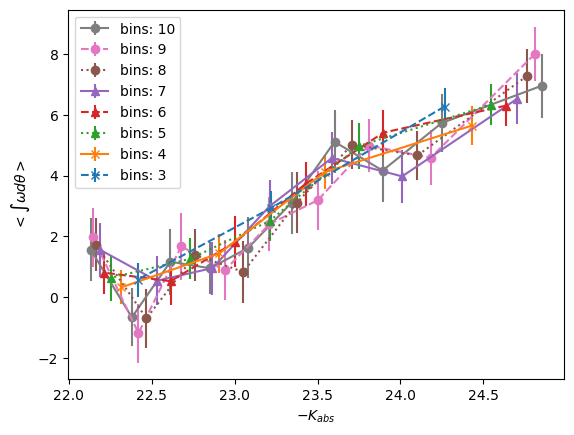

In [7]:
def get_fmts(num_fmts):
    from itertools import product

    # Define marker styles and line styles
    markers = ['o','^','x']  # Example markers
    lines = ['-', '--', ':']    # Example line styles

    # Generate combinations of marker and line styles up to num_fmts
    fmts = [f'{marker}{line}' for marker, line in product(markers, lines)] * (num_fmts // len(markers) * len(lines))

    # Trim the list to the desired number of fmts
    fmts = fmts[:num_fmts]

    return fmts 

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from astropy.io import ascii
from astropy.table import Table

nquants = [3,4,5,6,7,8,9,10][::-1]

fig, ax = plt.subplots()
colors = [f"C{i:02}" for i in range(len(nquants))][::-1]
fmts = get_fmts(len(nquants))

for nquant,c,fmt in zip(nquants,colors,fmts):

    data = ascii.read(f'../data/testing_cross+int_TreeCorr_nq{nquant}_magVSint.dat',\
                      names=['int_mean','int_std','meanMag'])
    meanMag = data['meanMag']
    int_mean = data['int_mean']
    int_std = data['int_std']


    ax.errorbar(-meanMag,int_mean,yerr=int_std,fmt=fmt,
                    c=c,label=f'bins: {nquant}')

ax.set_ylabel(r'$<\int\omega d\theta>$')
ax.set_xlabel(r'$-K_{abs}$')
ax.legend()


plt.show()


In [12]:
from itertools import product

# Define marker styles and line styles
markers = ['o', 's', '^']  # Example markers
lines = ['-', '--', ':']    # Example line styles

# Define the number of fmts you want to generate
num_fmts = 10  # Change this to the desired number of fmts

# Generate combinations of marker and line styles up to num_fmts
fmts = [f'{marker}{line}' for marker, line in product(markers, lines)] * (num_fmts // len(markers) * len(lines))

# Trim the list to the desired number of fmts
fmts = fmts[:num_fmts]

print(fmts)  # Output the list of fmts


['o-', 'o--', 'o:', 's-', 's--', 's:', '^-', '^--', '^:', 'o-']


### Same pero con linear regression

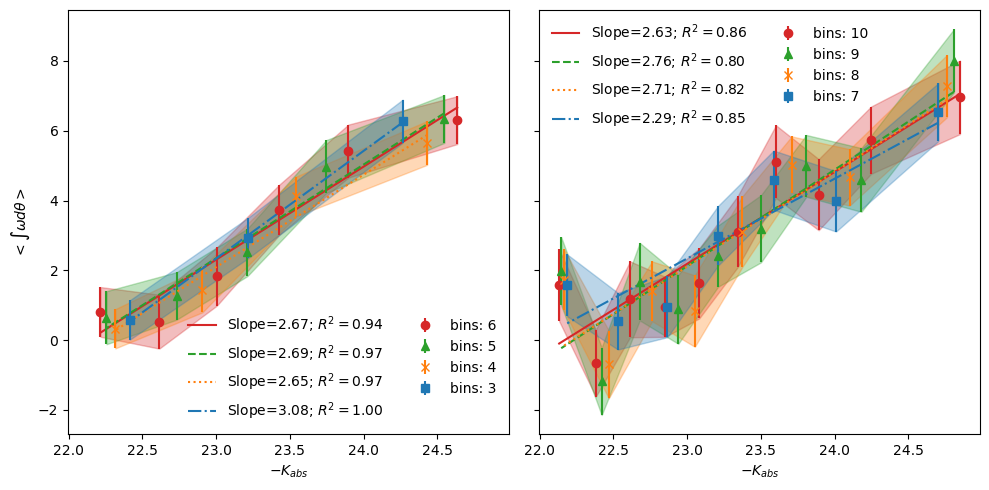

In [30]:
def get_fmts(num_fmts):
    from itertools import product

    # Define marker styles and line styles
    markers = ['o','^','x']  # Example markers
    lines = ['-', '--', ':']    # Example line styles

    # Generate combinations of marker and line styles up to num_fmts
    fmts = [f'{marker}{line}' for marker, line in product(markers, lines)] * (num_fmts // len(markers) * len(lines))

    # Trim the list to the desired number of fmts
    fmts = fmts[:num_fmts]

    return fmts 

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, stats
from astropy.io import ascii
from astropy.table import Table

nquants = [3,4,5,6][::-1]

fig, axs = plt.subplots(1,2,figsize=(10,5),sharey=True,sharex=True)
ax=axs[0]
ax2=axs[1]
colors = [f"C{i:02}" for i in range(len(nquants))][::-1]
if len(nquants)!=4:
    markers = np.random.choice(['o','^','x','s'],size=len(nquants))
    lines = np.random.choice(['-', '--', ':','-.'],size=len(nquants)) 
markers = ['o','^','x','s']
lines = ['-', '--', ':','-.']

for nquant,c,line,marker in zip(nquants,colors,lines,markers):

    data = ascii.read(f'../data/testing_cross+int_TreeCorr_nq{nquant}_magVSint.dat',\
                      names=['int_mean','int_std','meanMag'])
    meanMag = data['meanMag']
    int_mean = data['int_mean']
    int_std = data['int_std']

    res = stats.linregress(-meanMag, int_mean)
    ax.fill_between(-meanMag,y1=int_mean+int_std,y2=int_mean-int_std,color=c,alpha=.3)
    ax.plot(-meanMag, res.intercept - res.slope*meanMag, ls=line, c=c,\
            label=f'Slope={res.slope:.2f}; '+r'$R^2=$'+f'{res.rvalue**2:.2f}')
    ax.errorbar(-meanMag,int_mean,yerr=int_std,fmt=marker,
                    c=c,label=f'bins: {nquant}')
    

ax.set_ylabel(r'$<\int\omega d\theta>$')
ax.set_xlabel(r'$-K_{abs}$')
ax.legend(ncol=2,framealpha=0)

#####################

nquants = [7,8,9,10][::-1]
if len(nquants)!=4:
    markers = np.random.choice(['o','^','x','s'],size=len(nquants))
    lines = np.random.choice(['-', '--', ':','-.'],size=len(nquants)) 
markers = ['o','^','x','s']
lines = ['-', '--', ':','-.']

for nquant,c,line,marker in zip(nquants,colors,lines,markers):

    data = ascii.read(f'../data/testing_cross+int_TreeCorr_nq{nquant}_magVSint.dat',\
                      names=['int_mean','int_std','meanMag'])
    meanMag = data['meanMag']
    int_mean = data['int_mean']
    int_std = data['int_std']

    res = stats.linregress(-meanMag, int_mean)
    ax2.fill_between(-meanMag,y1=int_mean+int_std,y2=int_mean-int_std,color=c,alpha=.3)
    ax2.plot(-meanMag, res.intercept - res.slope*meanMag, ls=line, c=c,\
            label=f'Slope={res.slope:.2f}; '+r'$R^2=$'+f'{res.rvalue**2:.2f}')
    ax2.errorbar(-meanMag,int_mean,yerr=int_std,fmt=marker,
                    c=c,label=f'bins: {nquant}')
    

ax2.set_xlabel(r'$-K_{abs}$')
ax2.legend(ncol=2,framealpha=0)

plt.tight_layout()
plt.show()
